# 시각화 모듈(라이브러리)

그래프 시각화 추가 설명
- Matplotlib
- Seaborn

In [1]:
import seaborn as sns

In [3]:
# seaborn에서 제공하는 데이터셋

penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='flipper_length_mm', ylabel='Count'>

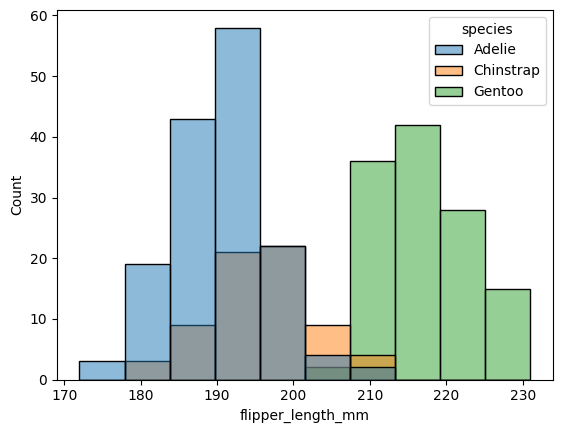

In [4]:
sns.histplot(data=penguins, x='flipper_length_mm', hue='species') 

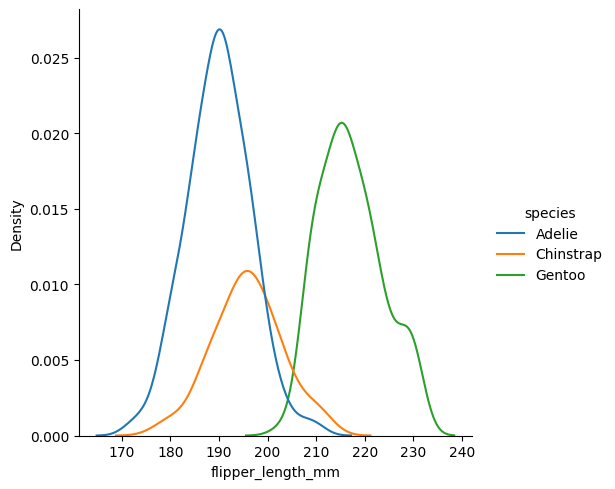

In [7]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', kind='kde') # 커널밀도추정

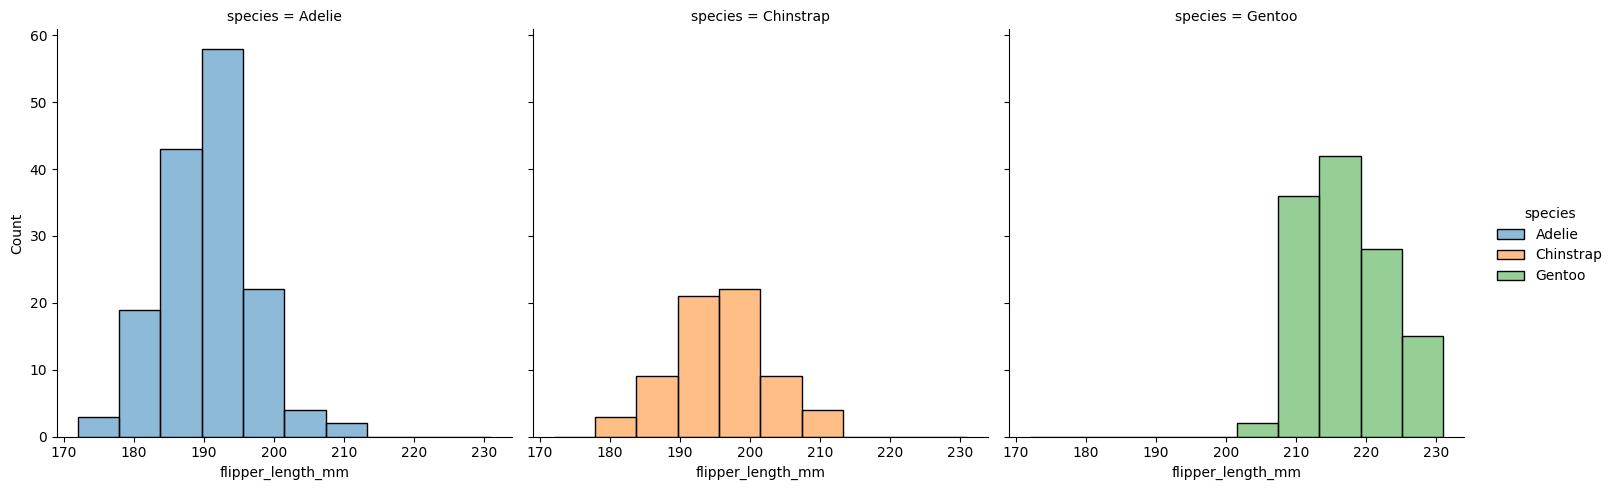

In [8]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='species')

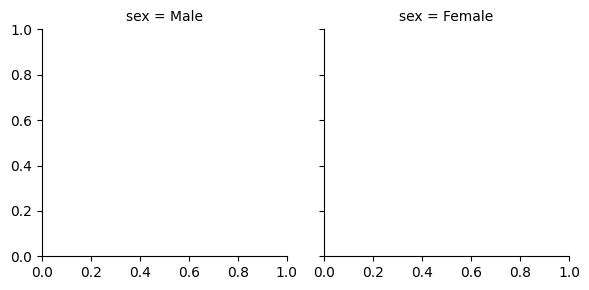

In [10]:
import matplotlib.pyplot as plt

# f, ax = plt.subplots(1, 2) # plt subplot -> 추가 설명
g = sns.FacetGrid(penguins, col='sex')

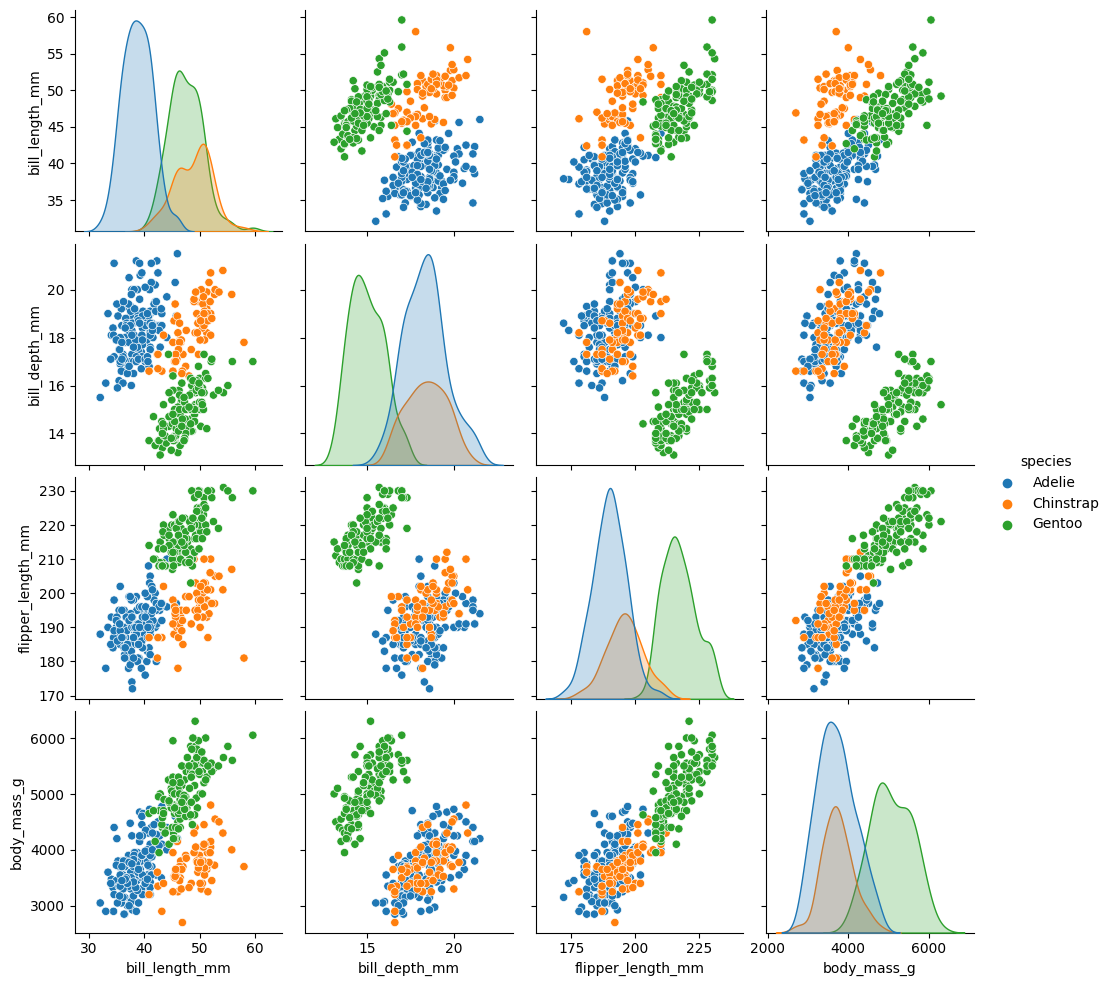

In [11]:
sns.pairplot(data=penguins, hue='species') # 상관관계에 대한 그래프 -> 변수들 간의 상관관계를 한 번 보여줌
# 상관관계: 수치형 데이터만

<ipython-input-17-407d3903983b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score') # 수치형 데이터


<Axes: xlabel='Task', ylabel='Model'>

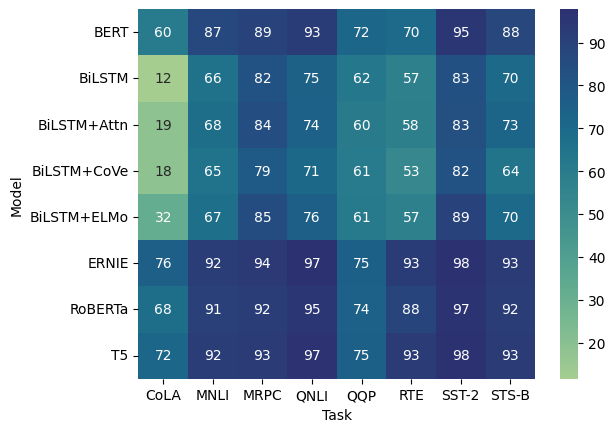

In [17]:
glue = sns.load_dataset('glue').pivot('Model', 'Task', 'Score') # 수치형 데이터
sns.heatmap(glue, annot=True, cmap='crest')

In [ ]:
# 변수 간 상관관계 -> pairplot, heatmap

# 상관관계

간단한 개념 추가 설명
- 두 변수 간의 선형 관계(비례, 반비례)를 설명
- 상관관계에 있다고 해서 인과관계를 가지는 것은 아님
- -1 ~ 1 -> 양 끝 값에 가까울수록 상관성이 높음

In [ ]:
# 상관관계 그래프를 그리기는 쉬움 -> 왜 그리는 지, 어떻게 해석할 지

# 불러오고, 살펴보고, 전처리 > 상관관계 추가

# IBM Attrtion 데이터

- IBM에서 만든 데이터 (가상 데이터)
- 여러 변수들(연봉, 직업만족도 ... ) -> 퇴사
- 여러 변수들 + 퇴사


- 연봉, 만족도, 가족, .... , 퇴사(0)
- 연봉, 만족도, 가족, .... , 퇴사(x)

In [18]:
# 파일명: WA_Fn-UseC_-HR-Employee-Attrition 2.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [21]:
df.info() # 데이터 타입 -> int, float / object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [31]:
df = df[:1000]
df.shape

(1000, 35)

In [32]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 데이터 전처리

- data type
- drop

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# object(string) -> 내가 어떤 형태로 변환을 해야하는가?
# object 인식이 어려운 경우가 많음 -> 2 가지: one-hot encoding(0, 1), 여러 종류: labelencoding(0, 1, 2, 3 ... )

#### 전체 데이터의 컬럼별 분산(히스토그램) 확인하기

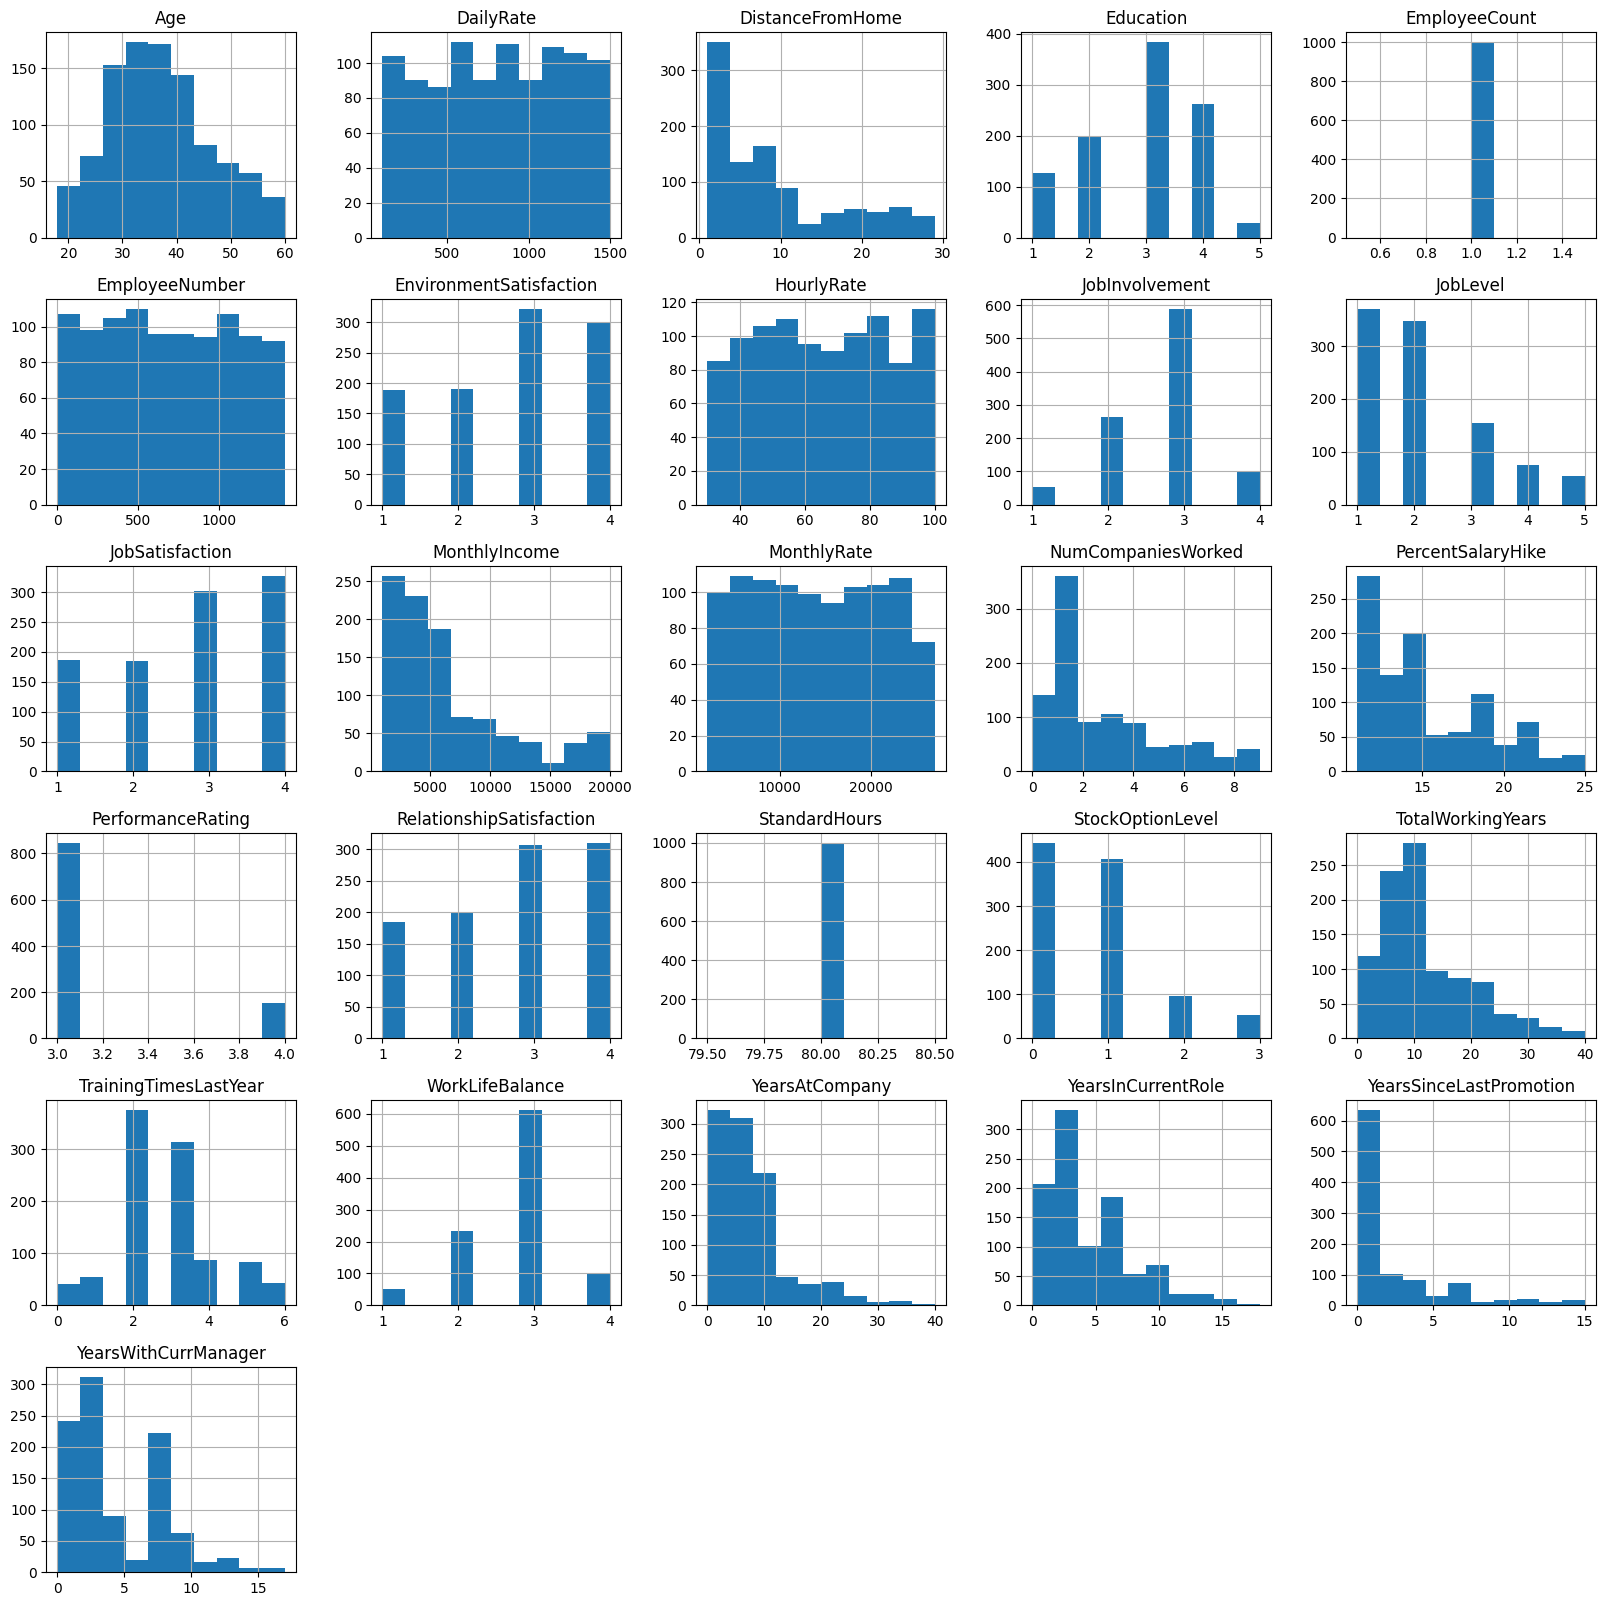

In [34]:
df.hist(figsize=(20, 20))
plt.show() # 전체 데이터 히스토그램 -> EmployeeCount, StandardHours

In [35]:
# Attrtion 퇴사인지 아닌지
df['Attrition'].value_counts()

#### Attrition pie graph

No     833
Yes    167
Name: Attrition, dtype: int64

#### 변수간 상관관계 확인하기

In [36]:
# 상관관계 파악하기

corr = df.corr()
corr.shape

<ipython-input-36-b682000dd119>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(26, 26)

<Axes: >

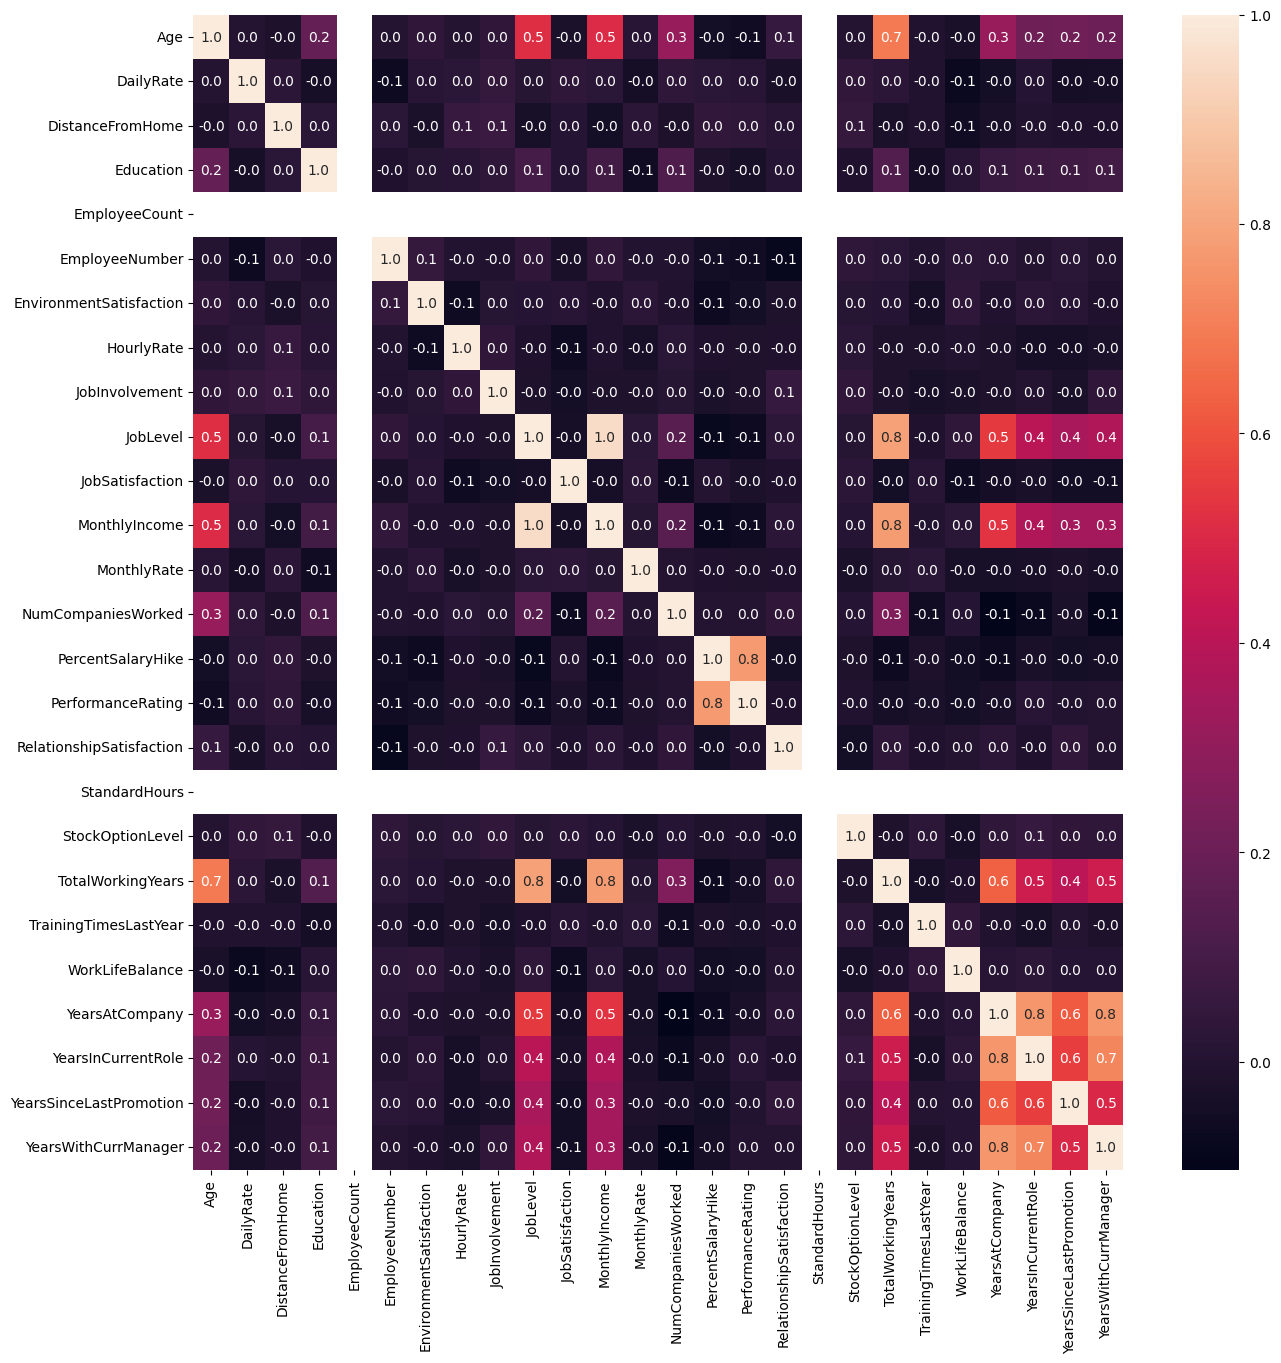

In [40]:
plt.figure(figsize=(15, 15))
# fmt='.1f'
sns.heatmap(corr, fmt='.1f', annot=True) # 문자로된 컬럼들이 빠져있다. Attrition
# -1, 1 양 끝 값에 가까울수록 상관관계
# 0.3 < a : 상관관계가 있다.
# 0.7 < a : 상관관계가 높다.

# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7
# 0.5 이상의 값들 찾아주세요.

In [ ]:
# EmployeeCount
# StandardHours
# drop

In [41]:
df['EmployeeCount'].head()

0    1
1    1
2    1
3    1
4    1
Name: EmployeeCount, dtype: int64

In [42]:
df['StandardHours'].head()

0    80
1    80
2    80
3    80
4    80
Name: StandardHours, dtype: int64

### 필요없는 데이터 drop 시키기

In [43]:
# EmployeeCount, StandardHours
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,43,No,Travel_Rarely,930,Research & Development,6,3,Medical,1402,1,...,3,1,0,20,3,1,20,7,1,8
996,27,No,Travel_Rarely,205,Sales,10,3,Marketing,1403,4,...,3,4,0,6,3,3,6,2,4,4
997,27,Yes,Travel_Rarely,135,Research & Development,17,4,Life Sciences,1405,4,...,3,4,0,8,2,3,8,2,7,7
998,26,No,Travel_Rarely,683,Research & Development,2,1,Medical,1407,1,...,3,4,0,5,2,3,4,3,1,1


In [44]:
df.shape

(1000, 33)

### 상관관계가 높은 변수들 위주로 데이터 탐색하기

In [ ]:
# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7

#### 전체 직원 중 퇴사 인원 비율 확인하기

In [53]:
# 전체 직원 중 퇴사 인원 비율
# [df['Attrition'] == 'Yes'].count() / df.count()
attrition = df['Attrition'][df['Attrition'] == 'Yes'].count()
total = df['Attrition'].count()
print(attrition)
print(total)

167
1000


In [60]:
attrition_p = (attrition / total) * 100
n_attrition = 100 - attrition_p

# 전체 직원 중 16.7%가 퇴사를 했다.

([<matplotlib.patches.Wedge at 0x7f03418b5600>,
 [Text(0.9520514449129607, 0.5509973196297274, 'Attrition'),
  Text(-0.9520514191189136, -0.5509973641984715, 'Working')],
 [Text(0.5193007881343421, 0.30054399252530584, '16.7%'),
  Text(-0.5193007740648619, -0.30054401683552984, '83.3%')])

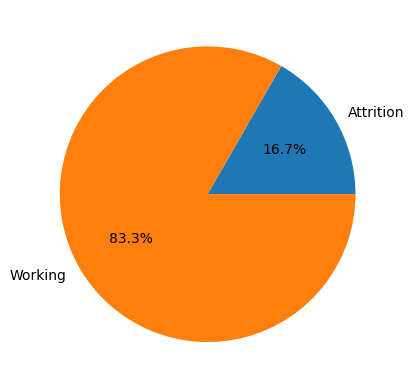

In [65]:
# pie graph (string 넣을 수 없음)
label = ['Attrition', 'Working']
plt.pie([attrition_p, n_attrition], labels=label, autopct="%.1f%%")

#### 직업 수준(Job level)에 따른 퇴사 비율 확인하기

In [66]:
# 직업 레벨에 따른 퇴사 비율
df['JobLevel'].head()

0    2
1    2
2    1
3    1
4    1
Name: JobLevel, dtype: int64

In [67]:
df['JobLevel'].value_counts() # unique 값의 갯수
# Entry, Mid, Senior, Lead, Excutive

1    370
2    347
3    155
4     74
5     54
Name: JobLevel, dtype: int64

In [69]:
# padas Catogorical
df['JobLevel'] = pd.Categorical(df['JobLevel']).rename_categories(['Entry', 'Mid', 'Senior', 'Lead', 'Excutive'])

df['JobLevel'].value_counts()

Entry       370
Mid         347
Senior      155
Lead         74
Excutive     54
Name: JobLevel, dtype: int64

In [70]:
df.head()
# df -> attrition yes, joblevel

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [85]:
attrition_joblevel = df['JobLevel'][df['Attrition'] == 'Yes'].value_counts()

In [ ]:
df['JobLevel'] # 전체 레벨 분포
attrition_joblevel # 퇴사자들 중 레벨 분포

In [90]:
# x 축에 넣을 값
attrition_joblevel.index.values

['Entry', 'Mid', 'Senior', 'Excutive', 'Lead']
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

In [92]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.2 MB/s eta 0:00:00


In [93]:
import koreanize_matplotlib

In [100]:
df['JobLevel'].sort_values(ascending=False) # 값의 크기에 따라서 1 - 5
# sort_values(ascending=True) 오름차순 -> 순서로 값을 정렬
# sort_values(by='JobLevel') string, list : 오름차순

# 여러 컬럼들 -> 리스트

233    Excutive
899    Excutive
186    Excutive
329    Excutive
326    Excutive
         ...   
288       Entry
673       Entry
289       Entry
671       Entry
239       Entry
Name: JobLevel, Length: 1000, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

In [102]:
df['JobLevel'].unique()

['Mid', 'Entry', 'Senior', 'Lead', 'Excutive']
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

In [103]:
df['JobLevel'].value_counts()

Entry       370
Mid         347
Senior      155
Lead         74
Excutive     54
Name: JobLevel, dtype: int64

In [105]:
attrition_joblevel

Entry       101
Mid          35
Senior       22
Excutive      5
Lead          4
Name: JobLevel, dtype: int64

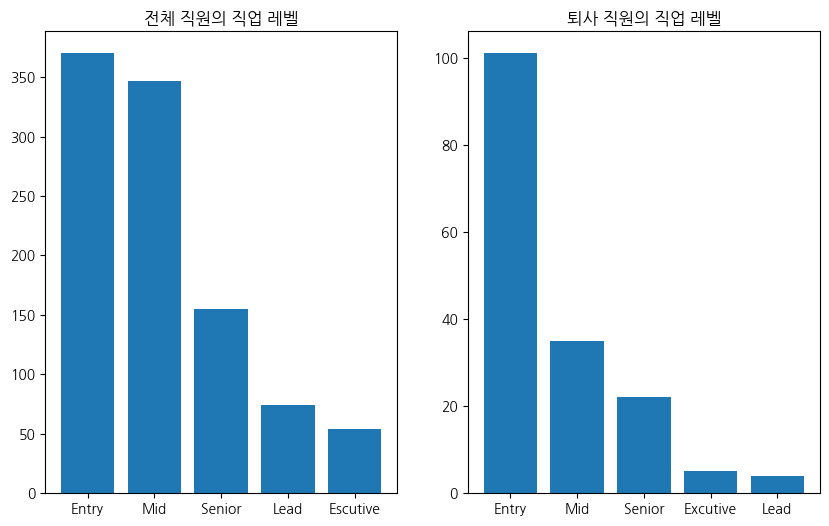

In [104]:
# df['JobLevel'] bar
# df['JobLevel'].unique() # x
# df['JobLevel'].value_counts() # y

# 원래 전체 직원 수 중 JobLevel 분포
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('전체 직원의 직업 레벨')
plt.bar(['Entry', 'Mid', 'Senior', 'Lead', 'Escutive'], df['JobLevel'].value_counts())

plt.subplot(1, 2, 2)
plt.title('퇴사 직원의 직업 레벨')
plt.bar(attrition_joblevel.index.values, attrition_joblevel)

plt.show()

In [106]:
attrition_joblevel # 적절한 인덱스 넣기

Entry       101
Mid          35
Senior       22
Excutive      5
Lead          4
Name: JobLevel, dtype: int64

#### 나이에 따른 퇴사 비율 확인하기

In [107]:
# 나이에 따른 퇴사 비율
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [113]:
df['Age'].describe()

count    1000.000000
mean       36.992000
std         9.417783
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [122]:
df['Age'].head()

0    41
1    49
2    37
3    33
4    27
Name: Age, dtype: int64

In [171]:
# 나이대 구간 별로 나누기
# 10대 ~ 60대
# df['Age_10_'] = (df['Age'] // 10) == 1

# 원하는 형식으로 조건에 맞는 값들만 넣어준다.
df['Age_10'] = df['Age'][(df['Age'] >= 10) & (df['Age'] < 20)]
df['Age_20'] = df['Age'][(df['Age'] >= 20) & (df['Age'] < 30)]
df['Age_30'] = df['Age'][(df['Age'] >= 30) & (df['Age'] < 40)]
df['Age_40'] = df['Age'][(df['Age'] >= 40) & (df['Age'] < 50)]
df['Age_50'] = df['Age'][(df['Age'] >= 50) & (df['Age'] < 60)]
df['Age_60'] = df['Age'][(df['Age'] >= 60) & (df['Age'] < 70)]

# df['Age_10_'] = (df['Age'] // 10) == 1
# 구간 별로 카운팅

In [139]:
# df['Age'] >= 10 & df['Age'] < 20:  10 이상 20 미만
# df['Age'] // 10 == 1: 10으로 나눴을 때 몫이 1
# (df['Age'] // 10) == 4
# Age 컬럼에 값만 각각 바꿔줌

# 여러 개의 컬럼들이 생성되었음
# 합쳐주기 -> 병합: concat, merge
# join -> outer(합집합), inner(교집합), left(왼쪽 기준), right(오른쪽 기준)
# conta
df['Age_10'] # 시리즈 형태(컬럼): 인덱스가 같음

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: Age_10, Length: 1000, dtype: float64

In [140]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_10,Age_20,Age_30,Age_40,Age_50,Age_60,Age_cat
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,4,0,5,NaN,NaN,NaN,41.0,NaN,NaN,41.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,7,1,7,NaN,NaN,NaN,49.0,NaN,NaN,49.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,0,0,NaN,NaN,37.0,NaN,NaN,NaN,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,7,3,0,NaN,NaN,33.0,NaN,NaN,NaN,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,2,2,2,NaN,27.0,NaN,NaN,NaN,NaN,NaN


In [148]:
# 데이터프레임들(시리즈) 합칠때, outer, inner, left, right
# concat(outer), merge(inner)
# 컬럼 기준
ages = [df['Age_10'], df['Age_20'], df['Age_30'], df['Age_40'], df['Age_50'], df['Age_60']]
age_cols = pd.concat(ages, axis=1)

In [152]:
age_cols

,Age_10,Age_20,Age_30,Age_40,Age_50,Age_60
0,NaN,NaN,NaN,41.0,NaN,NaN
1,NaN,NaN,NaN,49.0,NaN,NaN
2,NaN,NaN,37.0,NaN,NaN,NaN
3,NaN,NaN,33.0,NaN,NaN,NaN
4,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,43.0,NaN,NaN
996,NaN,27.0,NaN,NaN,NaN,NaN
997,NaN,27.0,NaN,NaN,NaN,NaN
998,NaN,26.0,NaN,NaN,NaN,NaN


In [145]:
import numpy as np

In [153]:
# 조건에 따라서 값을 넣어줌
# 컬럼, 행으로 값을 넣어주어야함
# 행기준으로 데이터를 순회하면서 값이 있는 것을 새로운 컬럼에 넣어준다.

# numpy where
# np.where(조건, 참일 때 넣어줄 값, 거짓일때 넣어줄 값)
# padas loc

# 계속 바꿔주어야할 부분
# df['Ages'] = np.where(df['Age_10'].isnull() == False, df['Age_10'], 0)
col_name = list(age_cols.columns)
# ['Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60']
col_dic = {
    'Age_10': 10,
    'Age_20': 20,
    'Age_30': 30
}

### 수정 코드
# 새로운 컬럼 생성
df['Ages'] = ''

# 연령대 컬럼을 하나의 컬럼으로 표현
for col, age in col_dic.items():
    df.loc[df[col].notnull(), 'Ages'] = age

# 컬럼 삭제: 선택사항
# df.drop(col_name, axis=1, inplace=True)

# 결과 확인
print(df['Ages'])

KeyError: ignored

In [161]:
# loc
# cities = region.loc[:, region.columns[:-1]]
# df.loc['label', 'col: 변하는 부분']

# boolean indexing
'''
# 20대, 30대
df['Age_10'][df.loc[:, 'Age_10'].isnull() == False] # series
df['Age_20'][df.loc[:, 'Age_20'].isnull() == False] # series
df['Age_30'][df.loc[:, 'Age_30'].isnull() == False] # series
'''
col_name

127    19.0
149    19.0
171    19.0
177    19.0
296    18.0
301    18.0
422    19.0
457    18.0
688    19.0
727    18.0
828    18.0
853    19.0
892    19.0
909    19.0
972    18.0
Name: Age_10, dtype: float64

In [151]:
col_name

['Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60']

In [149]:
age_cols.columns

Index(['Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60'], dtype='object')

In [147]:
df['Ages']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: Ages, Length: 1000, dtype: float64

In [ ]:
'''
행에 다른 값을 찾아갈 때

1. where
np.where(조건(반복되는 부분), 참일 때 넣어줄 값, 거짓일 때 넣어줄 값)
-> for문을 이용해서 변하는 변수들을 바꿔줌

2. loc
df.loc['label(인덱스)'(, col(컬럼명))]
-> for문을 이용해서 변하는 변수들을 바꿔줌


## Tip. for문 순회할 때
원하는 값을 모으고 싶으면 for문 바깥에 변수(저장할 공간)를 선언해주어야함

'''

In [166]:
# 데이터 확인 (null 값이 아닌 것)
# df['Age_10'][df['Age_10'].isnull() == False]
# np.where(조건, 참일 때 넣어줄 값, 거짓일때 넣어줄 값)


# where 조건 반복 코드
# 연령대 컬럼을 하나의 컬럼으로 표현

### 수정 코드
# df['Ages'] = np.where(df['Age_10'].isnull() == False, 10, None)
for col, age in col_dic.items():
    df['Ages'] = np.where(df[col].notnull(), age, df['Ages'])

In [168]:
df['Ages'].value_counts()

10    15
Name: Ages, dtype: int64

In [169]:
df['Ages'] = np.where(df['Age_20'].isnull() == False, 20, None)
df['Ages'].value_counts()

20    211
Name: Ages, dtype: int64

In [175]:
# loc
# 조건
# df.loc[:, 'Age_10']
# df['Age_10'][df.loc[:, 'Age_10'].isnull() == False]
# 조건 -> 조건에 맞는 값을 새로운 컬럼에 넣어주기
df['Age_10'][df.loc[:, 'Age_10'].isnull() == False]      # df['Age_10']

127    19.0
149    19.0
171    19.0
177    19.0
296    18.0
301    18.0
422    19.0
457    18.0
688    19.0
727    18.0
828    18.0
853    19.0
892    19.0
909    19.0
972    18.0
Name: Age_10, dtype: float64

In [222]:
# age_10 age_20
# age_10: [df.loc[:, 'Age_10'].isnull() == False] -> 인덱스

# 10대 인덱스
# 20대 인덱스
# 30대 인덱스
# 40대 인덱스
# 50대 인덱스
# 60대 인덱스

# nature = nature.drop(labels=nature[nature['관광지명'].str[-1] == '항'].index, axis=0)
age_10 = df['Age'][df.loc[:, 'Age_10'].isnull() == False] # 10대 고유의 인덱스값
age_20 = df['Age'][df.loc[:, 'Age_20'].isnull() == False] # 20대 고유의 인덱스값
age_30 = df['Age'][df.loc[:, 'Age_30'].isnull() == False] # 30대 고유의 인덱스값
age_40 = df['Age'][df.loc[:, 'Age_40'].isnull() == False] # 40대 고유의 인덱스값
age_50 = df['Age'][df.loc[:, 'Age_50'].isnull() == False] # 50대 고유의 인덱스값
age_60 = df['Age'][df.loc[:, 'Age_60'].isnull() == False] # 60대 고유의 인덱스값


127

In [218]:
# 10대 인덱스
a_10 = list(age_10.index)

# loc: 전체 데이터에서 index=4
# df.loc[a_10[0], 'Ages'] = '10대'
# print(df.loc[a_10, 'Ages'])
df.loc[a_10, 'Ages'] = '10대'
print(df.loc[a_10, 'Ages'])

127    10대
149    10대
171    10대
177    10대
296    10대
301    10대
422    10대
457    10대
688    10대
727    10대
828    10대
853    10대
892    10대
909    10대
972    10대
Name: Ages, dtype: object
0      None
1      None
2      None
3      None
4        20
       ... 
995    None
996      20
997      20
998      20
999    None
Name: Ages, Length: 1000, dtype: object


In [219]:
# 20대 인덱스
a_20 = list(age_20.index)

# loc: 전체 데이터에서 index=4
# df.loc[a_10[0], 'Ages'] = '10대'
# print(df.loc[a_10, 'Ages'])
df.loc[a_20, 'Ages'] = '20대'
print(df.loc[a_20, 'Ages'])

4      20대
11     20대
14     20대
15     20대
17     20대
      ... 
984    20대
993    20대
996    20대
997    20대
998    20대
Name: Ages, Length: 211, dtype: object


In [223]:
a_30 = list(age_30.index)
a_40 = list(age_40.index)
a_50 = list(age_50.index)
a_60 = list(age_60.index)

df.loc[a_30, 'Ages'] = '30대'
df.loc[a_40, 'Ages'] = '40대'
df.loc[a_50, 'Ages'] = '50대'
df.loc[a_60, 'Ages'] = '60대'

In [224]:
print(df['Ages'].value_counts())

30대    413
40대    226
20대    211
50대    131
10대     15
60대      4
Name: Ages, dtype: int64


In [225]:
df['Ages'].head()

0    40대
1    40대
2    30대
3    30대
4    20대
Name: Ages, dtype: object

In [226]:
df['Ages'].value_counts().index

Index(['30대', '40대', '20대', '50대', '10대', '60대'], dtype='object')

In [230]:
# 퇴사 그래프
attrition_age = df['Ages'][df['Attrition'] == 'Yes']

In [232]:
attrition_age.value_counts()

30대    60
20대    57
40대    24
50대    17
10대     9
Name: Ages, dtype: int64

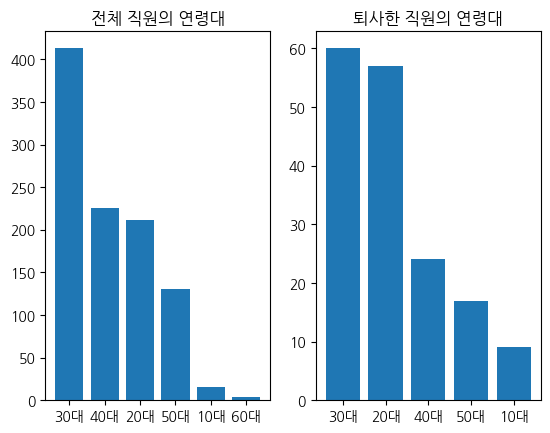

In [234]:
# bar graph -> 전체 연령에 대한 그래프
# sort_value -> 정렬
plt.subplot(1, 2, 1)
plt.title('전체 직원의 연령대')
plt.bar(df['Ages'].value_counts().index, df['Ages'].value_counts())

plt.subplot(1, 2, 2)
plt.title('퇴사한 직원의 연령대')
plt.bar(attrition_age.value_counts().index, attrition_age.value_counts())

plt.show()

#### 직급에 따른 연봉 확인하기

In [235]:
# 직급에 따른 연봉
# PercentSalaryHike - PerformanceRating 0.8
# TotalWorkingYears - Age 0.7
# TotalWorkingYears - JobLevel 0.8
# YearsWithCurrManager - YearsAtCompany 0.8
# YearsWithCurrManager - YearsCurrentRole 0.7

# tip) PercentSalaryHike: (New Salary - Current Salary) / Current Salary * 100 연봉인상률

df.columns
# 직급: JobLevel
# 월수익: MonthlyIncome * 12 -> 연봉

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Age_10', 'Age_20', 'Age_30', 'Age_40', 'Age_50', 'Age_60', 'Age_cat',
       'Ages'],
      dtype='object')

In [236]:
df['JobLevel'].head()

0      Mid
1      Mid
2    Entry
3    Entry
4    Entry
Name: JobLevel, dtype: category
Categories (5, object): ['Entry', 'Mid', 'Senior', 'Lead', 'Excutive']

In [240]:
df['annual_s'] = df['MonthlyIncome'] * 12
print(df['annual_s'])

0       71916
1       61560
2       25080
3       34908
4       41616
        ...  
995     48972
996     69228
997     28728
998     46848
999    201588
Name: annual_s, Length: 1000, dtype: int64


In [242]:
# 직급별 연봉
# 기준이 되는 데이터, 적용할 데이터 -> groupby
# groupby('기준이되는데이터')['컬럼'].함수() -> mean
# nature.groupby('시/군/구')['검색건수'].sum()

job_annual_salary = df.groupby('JobLevel')['annual_s'].mean()

In [245]:
job_annual_salary

JobLevel
Entry        33264.681081
Mid          65457.475504
Senior      118516.877419
Lead        185649.081081
Excutive    229540.888889
Name: annual_s, dtype: float64

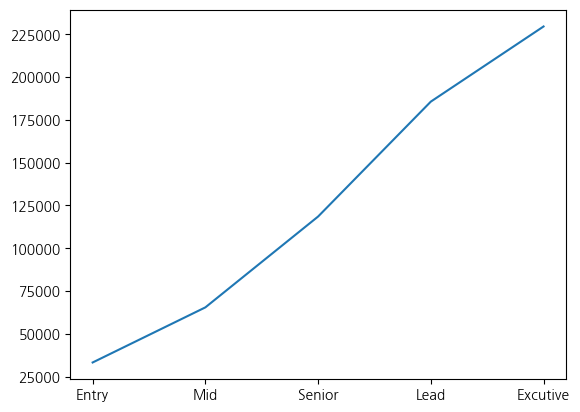

In [246]:
# plot -> 연속된 값이 아니기 때문에 선 그래프가 적절하지 않다.
plt.plot(job_annual_salary)
plt.show()

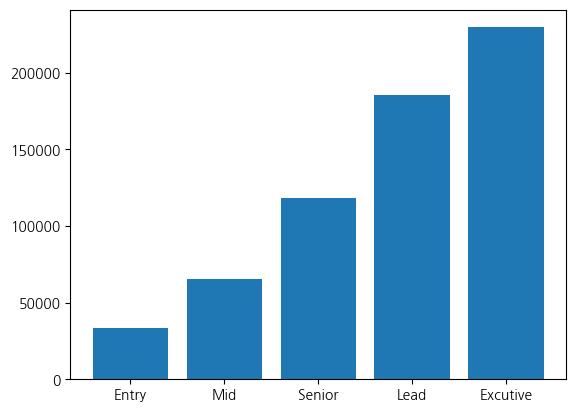

In [247]:
# bar
plt.bar(job_annual_salary.index, job_annual_salary)
plt.show()

In [250]:
job_annual_salary

JobLevel
Entry        33264.681081
Mid          65457.475504
Senior      118516.877419
Lead        185649.081081
Excutive    229540.888889
Name: annual_s, dtype: float64

<Axes: xlabel='JobLevel', ylabel='annual_s'>

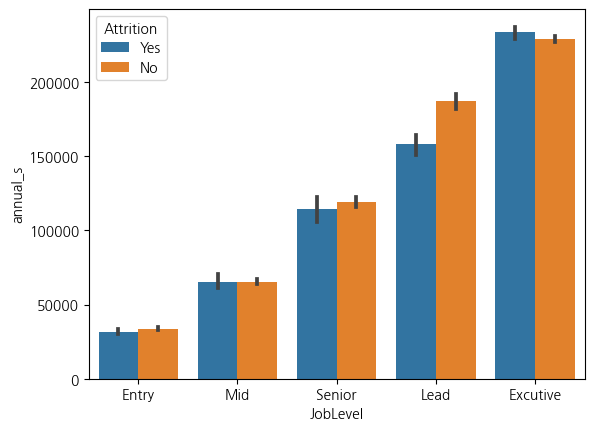

In [253]:
sns.barplot(data=df, x='JobLevel', y='annual_s', hue='Attrition')

#### 그래프는 쉽게 그릴 수 있지만 퇴사자의 직급별 연봉 그려보기

#### 성별에 따른 퇴사 비율 확인하기

In [254]:
# 성별에 따른 퇴사 비율 (퇴사자 중 남녀성비)
# Gender

df['Gender'].value_counts()

Male      584
Female    416
Name: Gender, dtype: int64

In [256]:
# 퇴사자를 먼저 뽑고
# 성별대로 분리

attrition_g = df['Gender'][df['Attrition'] == 'Yes']

In [265]:
# groupby -> 자습
# one-hot encoding: 텍스트(범주형) -> 숫자
# 남/녀, 정상/비정상, 오전/오후 ...
# 0/1
# Gender Male(0), Female(1)

# 1. 판다스에서 제공하는 get_dummies
# pd.get_dummies(df, columns=[])
oh_gender = pd.get_dummies(df, columns=['Gender'])
oh_gender['Gender_Female'][oh_gender['Gender_Female'] == 1].count()   # .notnull().sum() 값이 있는 것 확인할 때 (null 아닌 값)
# gender 별 분류 -> 성별 카운팅 가능

416

In [266]:
oh_gender['Gender_Male'][oh_gender['Gender_Male'] == 1].count() 

584

In [ ]:
# Scikitlearn

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit('값')

In [ ]:
# 연봉에 따른 퇴사 비율

In [ ]:
# 연차에 따른 퇴사 비율